# Smec experiments
In this notebook Smec is used to run some economic policy experiments. 

## Import the modelflow library 

In [2]:
from modelclass import model


## Load the model and a baseline
This will load the model and the baseline solution

In [3]:
msmec,baseline = model.modelload('../data/smec_lang.pcim')

file read:  C:\mfmodeller_raw\smec\smec dec 2023\data\Smec_lang.pcim


## Simulate the baseline
then run a baseline scenario 

In [6]:
_ = msmec(baseline,2033,2100,silent=1,keep='Baseline')

## Create some experiments
This is done by creating first create a dataframe with updated exogenous variables. Then the model is simulated using this dataframe. 

### Public spending up
Create a scenario where public spending **FCOZ**   is increased by 0.1 percent of gdp. 
 - First FCOZ   is fixed to its value by setting ```DFCOZ=1```. 
 - Then  then the the value is in given a lift if 0.1 percent of gdp with ```zfcoz = zfcoz + 0.001*y/pcoz```

In [7]:
off_forbrug = baseline.mfcalc('''\
<2030 2250>
dfcoz = 1
zfcoz = zfcoz + 0.001*y/pcoz
''')

#### Now run the new scenario
Then the model is solved by _ = msmec(off_forbrug,keep = 'offentligt forbrug op med 1 promille af BNP' ) <br>
The keep=, parameter is used to name the scenario and make the solution avaiable in the msmec object. 

In [28]:
_ = msmec(off_forbrug,keep = 'Offentligt forbrug op med 1 percent af BNP' ,silent=1)

Iteration  0 Sum of distances    2,734.052442
Iteration  1 Sum of distances       18.596682
Iteration  2 Sum of distances        0.039989
Iteration  3 Sum of distances        0.000062
2033 Solved in 3 iterations
Iteration  0 Sum of distances    5,091.117063
Iteration  1 Sum of distances    1,097.011476
Iteration  2 Sum of distances       17.785931
Iteration  3 Sum of distances        0.373847
Iteration  4 Sum of distances        0.004638
Iteration  5 Sum of distances        0.000134
2034 Solved in 5 iterations
Iteration  0 Sum of distances    8,094.487409
Iteration  1 Sum of distances    2,468.713693
Iteration  2 Sum of distances       84.409362
Iteration  3 Sum of distances        2.538186
Iteration  4 Sum of distances        0.086923
Iteration  5 Sum of distances        0.004911
Iteration  6 Sum of distances        0.000099
2035 Solved in 6 iterations
Iteration  0 Sum of distances   11,002.614991
Iteration  1 Sum of distances    4,258.562253
Iteration  2 Sum of distances      217.047

Iteration  1 Sum of distances   23,277.845436
Iteration  2 Sum of distances    2,044.613639
Iteration  3 Sum of distances      250.613815
Iteration  4 Sum of distances       24.536058
Iteration  5 Sum of distances        4.128013
Iteration  6 Sum of distances        0.211343
Iteration  7 Sum of distances        0.020839
Iteration  8 Sum of distances        0.002955
Iteration  9 Sum of distances        0.000336
2064 Solved in 9 iterations
Iteration  0 Sum of distances   32,417.379612
Iteration  1 Sum of distances   27,015.762970
Iteration  2 Sum of distances    2,626.651593
Iteration  3 Sum of distances      374.408537
Iteration  4 Sum of distances       38.714003
Iteration  5 Sum of distances        7.667141
Iteration  6 Sum of distances        0.428151
Iteration  7 Sum of distances        0.048926
Iteration  8 Sum of distances        0.007369
Iteration  9 Sum of distances        0.001053
Iteration  10 Sum of distances        0.000130
2065 Solved in 10 iterations
Iteration  0 Sum of di

Iteration  11 Sum of distances        0.000000
2089 Solved in 11 iterations
Iteration  0 Sum of distances   55,949.069185
Iteration  1 Sum of distances    5,169.362323
Iteration  2 Sum of distances       61.519927
Iteration  3 Sum of distances        0.822903
Iteration  4 Sum of distances        0.014844
Iteration  5 Sum of distances        0.000219
2090 Solved in 5 iterations
Iteration  0 Sum of distances   57,177.341124
Iteration  1 Sum of distances   10,961.360238
Iteration  2 Sum of distances      260.938216
Iteration  3 Sum of distances        6.885404
Iteration  4 Sum of distances        0.239663
Iteration  5 Sum of distances        0.007423
Iteration  6 Sum of distances        0.000118
2091 Solved in 6 iterations
Iteration  0 Sum of distances   58,433.756824
Iteration  1 Sum of distances   17,100.269209
Iteration  2 Sum of distances      603.855995
Iteration  3 Sum of distances       24.443397
Iteration  4 Sum of distances        1.210519
Iteration  5 Sum of distances        0.0

### Reduction of tax on lowest bracket

In [9]:
bundskat = baseline.mfcalc('<2030 2250> tsb = tsb - 0.01*y/(bysb*ysp*kssysp)')
_ = msmec(bundskat,keep = 'Bundskat ned med 1 promille af BNP' )

### 1 percent increase in labour supply 

In [17]:
laboursupply = baseline.upd('<2030 2250> ua_s * 1.01')
_ = msmec(laboursupply,keep = '1 percent increase in labour supply' )

### 1 percent decrease in value added tax 

In [11]:
wat = baseline.upd('<2030 2250> tg + -0.01')
_ = msmec(wat,keep = '1 percent decrease in value added tax' )

## Display results
If the notebook is part run "live" in jupyter the user can select how to display the results. If you are in a "static" jupyterbook the interface is not live.  

In [26]:
msmec.keep_show(smpl = (2025,2060),select_scenario=True,use_smpl=True)

## Crawl the dependency graph 
This will allow you to interactive explore the pathways of the impact of the experiment 

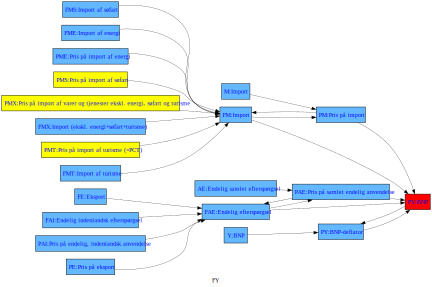

In [15]:
with msmec.set_smpl(2025,2050):
    msmec.fy.tracepre(up=2)